### https://towardsdatascience.com/remove-text-from-images-using-cv2-and-keras-ocr-24e7612ae4f4

In [2]:
pip install keras_ocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 25.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 21.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.2/279.2 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 8.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Looking for /Users/shreyas/.keras-ocr/craft_mlt_25k.h5


2024-04-03 16:36:27.452972: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-03 16:36:27.453747: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-03 16:36:27.454327: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Looking for /Users/shreyas/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 1s 871ms/step


2024-04-03 16:36:28.815878: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-03 16:36:28.816640: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-03 16:36:28.817218: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 1s 1s/step


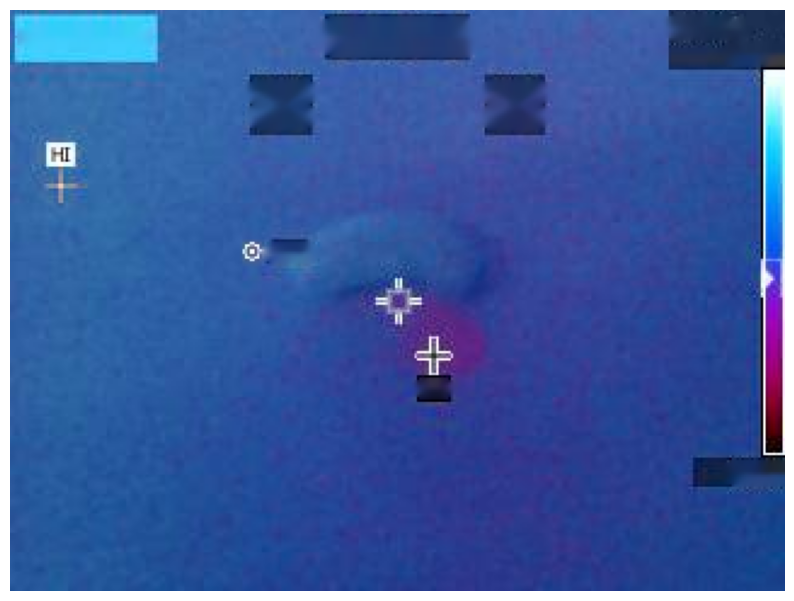

array([[[ 61, 108, 176],
        [ 46, 104, 170],
        [ 41, 116, 178],
        ...,
        [ 28,  48,  83],
        [ 27,  47,  82],
        [ 26,  46,  81]],

       [[ 58, 108, 174],
        [ 46, 107, 171],
        [ 46, 128, 186],
        ...,
        [ 27,  47,  82],
        [ 26,  46,  81],
        [ 25,  45,  80]],

       [[ 54, 111, 172],
        [ 51, 119, 178],
        [ 68, 159, 214],
        ...,
        [ 26,  46,  81],
        [ 25,  45,  80],
        [ 25,  45,  80]],

       ...,

       [[ 39,  88, 156],
        [ 39,  88, 156],
        [ 39,  88, 156],
        ...,
        [ 25,  64, 138],
        [ 25,  64, 138],
        [ 24,  65, 138]],

       [[ 35,  84, 152],
        [ 36,  85, 153],
        [ 38,  87, 155],
        ...,
        [ 25,  66, 139],
        [ 25,  66, 139],
        [ 24,  67, 140]],

       [[ 32,  81, 149],
        [ 34,  83, 151],
        [ 38,  87, 155],
        ...,
        [ 27,  68, 141],
        [ 25,  68, 141],
        [ 25,  68, 141]]

In [6]:
import matplotlib.pyplot as plt
import keras_ocr
import cv2
import math
import numpy as np

def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2) / 2)
    y_mid = int((y1 + y2) / 2)
    return (x_mid, y_mid)

# Set up a keras-ocr pipeline
pipeline = keras_ocr.pipeline.Pipeline()

def inpaint_text(img_path, pipeline):
    img = keras_ocr.tools.read(img_path)
    prediction_groups = pipeline.recognize([img])
    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1] 
        x2, y2 = box[1][2]
        x3, y3 = box[1][3] 
        
        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mid1 = midpoint(x0, y0, x3, y3)
        
        thickness = int(math.sqrt((x2 - x1)**2 + (y2 - y1)**2))
        
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mid1), 255, thickness)
        
    img_inpaint = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
    
    # Convert to RGB for matplotlib display
    img_inpaint = cv2.cvtColor(img_inpaint, cv2.COLOR_BGR2RGB)
    #cv2.imwrite(‘text_free_image.jpg’,img_rgb)
    # Display the inpainted image
    plt.figure(figsize=(10, 10))
    plt.imshow(img_inpaint)
    plt.axis('off')
    plt.show()
    return img_inpaint

imagepath = '../Images/IR_00002.jpg'
inpaint_text(imagepath,pipeline)
